In [2]:
import mlrose_hiive
import numpy as np
import pandas as pd
import timeit
import matplotlib.pyplot as plt

Randimized Hill Climb
Randimized Hill Climb Time:  858.544992612
1999.6138613861385 2007.0
858.3802486989999


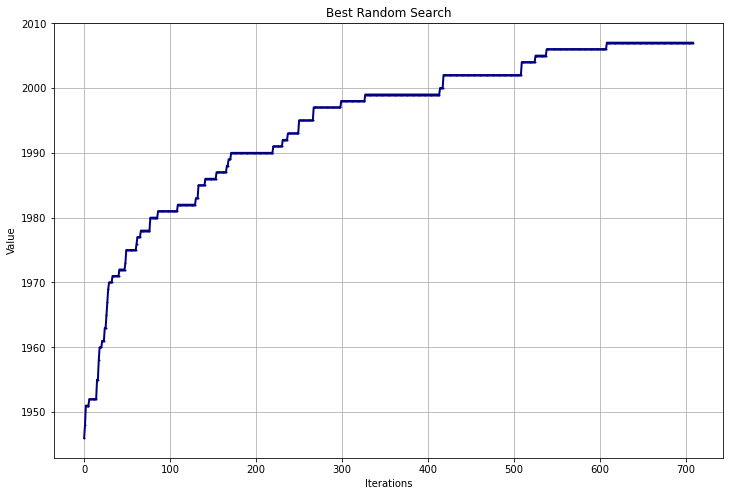

Simulated Annealing
Simulated Annealing Time:  171.42098631800002
2009.5 2012.0
9.474956913000003
5.82397078799994
11.193627752999987
5.302692981000007
7.762909591999971
11.080441315999963
10.27613585100005
11.00008038149997
11.109166362500105
11.725587192000035
9.474956913000003


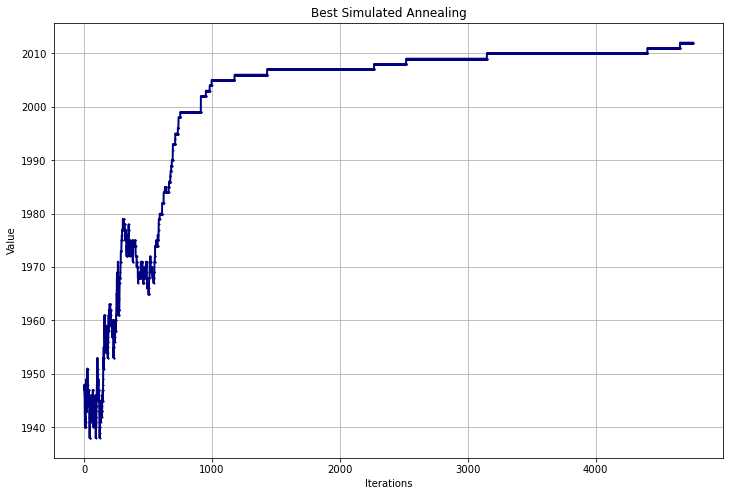

Genetic Algorithm
Genetic Algorithm Time:  1768.5404186069998
Max and mean
2013.0 2008.0 196.4986829491111
Mutation Rate
0.10    2006.666667
0.25    2009.666667
0.50    2007.666667
Name: Fitness, dtype: float64
Population Size
50     2002.666667
200    2009.000000
500    2012.333333
Name: Fitness, dtype: float64
Population Size
50      32.635342
200    123.249314
500    433.611393
Name: Time, dtype: float64
MIMIC
MIMIC Time:  6804.0129249619995
Max and mean
1989.0 1972.5555555555557 755.9967463178889
Keep Percent
0.25    1969.666667
0.50    1976.333333
0.75    1971.666667
Name: Fitness, dtype: float64
Population Size
50     1958.333333
200    1974.000000
500    1985.333333
Name: Fitness, dtype: float64
Population Size
50      131.200178
200     443.236084
500    1693.553977
Name: Time, dtype: float64


In [4]:
# define alternative N-Queens fitness function for maximization prob.
def queeens_max(state):
    fitness_cnt = 0
    for i in range(len(state)-1):
        for j in range(i+1, len(state)):
            # check for attacking pairs
            if (state[j] != state[i]) \
                and (state[j] != state[i] + (j-i)) \
                and (state[j] != state[i] - (j-i)):
                
                # if noa attack
                fitness_cnt +=1

    return fitness_cnt

def randomized_hill_climb(problem):
    print('Randimized Hill Climb')
    start = timeit.default_timer()
    runner_return = mlrose_hiive.RHCRunner(problem, experiment_name="first_try", 
                                           iteration_list=[10000],
                                           seed=42, max_attempts=100, 
                                           restart_list=[100])
    rhc_run_stats, rhc_run_curves = runner_return.run()
    stop = timeit.default_timer()
    print('Randimized Hill Climb Time: ', stop - start)  
    
    best_index_in_curve = rhc_run_curves.Fitness.idxmax()
    best_decay = rhc_run_curves.iloc[best_index_in_curve].current_restart
    best_curve = rhc_run_curves.loc[rhc_run_curves.current_restart == best_decay, :]
    best_curve.reset_index(inplace=True)
    print(best_decay)
    
    
    ax = best_curve.Fitness.plot(lw=2, colormap='jet', marker='.', markersize=2, 
                                 figsize=(12,8), grid=1,
                                 title='Best Random Search')
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Value")
    
    last_iters = rhc_run_stats[rhc_run_stats.Iteration != 0].reset_index()
    print(last_iters.Fitness.mean(), last_iters.Fitness.max())
    print(last_iters.Time.max())
    
    plt.show()
    
def simulated_annealing(problem):
    print('Simulated Annealing')
    start = timeit.default_timer()
    
    sa = mlrose_hiive.SARunner(problem, experiment_name="SA_Exp", 
                               iteration_list=[100000],
                               temperature_list=[1, 10, 50, 100, 250, 500, 1000, 2500, 5000],
                               decay_list=[mlrose_hiive.ExpDecay,
                                           mlrose_hiive.GeomDecay],
                               seed=42, max_attempts=100)

    sa_run_stats, sa_run_curves = sa.run()
    
    stop = timeit.default_timer()
    print('Simulated Annealing Time: ', stop - start)  
    
    last_iters = sa_run_stats[sa_run_stats.Iteration != 0].reset_index()
    print(last_iters.Fitness.mean(), last_iters.Fitness.max())
    print(last_iters.Time.mean())
    
    
    best_index_in_curve = sa_run_curves.Fitness.idxmax()
    best_decay = sa_run_curves.iloc[best_index_in_curve].Temperature
    best_curve = sa_run_curves.loc[sa_run_curves.Temperature == best_decay, :]
    best_curve.reset_index(inplace=True)
    print(best_decay)
    
    
    print(last_iters.loc[last_iters.schedule_init_temp == 1, "Time"].mean())
    print(last_iters.loc[last_iters.schedule_init_temp == 10, "Time"].mean())
    print(last_iters.loc[last_iters.schedule_init_temp == 50, "Time"].mean())
    print(last_iters.loc[last_iters.schedule_init_temp == 100, "Time"].mean())
    print(last_iters.loc[last_iters.schedule_init_temp == 250, "Time"].mean())
    print(last_iters.loc[last_iters.schedule_init_temp == 500, "Time"].mean())
    print(last_iters.loc[last_iters.schedule_init_temp == 1000, "Time"].mean())
    print(last_iters.loc[last_iters.schedule_init_temp == 2500, "Time"].mean())
    print(last_iters.loc[last_iters.schedule_init_temp == 5000, "Time"].mean())

    print(last_iters.loc[:, "Time"].mean())
    
    ax = best_curve.Fitness.plot(lw=2, colormap='jet', marker='.', markersize=2, 
                                 figsize=(12,8), grid=1,
                                 title='Best Simulated Annealing')
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Value")
    
    plt.show()

def genetic_algorithm(problem):
    print('Genetic Algorithm')
    start = timeit.default_timer()
    
    ga = mlrose_hiive.GARunner(problem=problem,
                              experiment_name="GA_Exp",
                              seed=42,
                              iteration_list=[100000],
                              max_attempts=100,
                              population_sizes=[50, 200, 500],
                              mutation_rates=[0.1, 0.25, 0.5])
    ga_run_stats, ga_run_curves = ga.run()
    
    stop = timeit.default_timer()
    print('Genetic Algorithm Time: ', stop - start)  
    
    
    last_iters = ga_run_stats[ga_run_stats.Iteration != 0].reset_index()
    print("Max and mean")
    print(last_iters.Fitness.max(), last_iters.Fitness.mean(), last_iters.Time.mean())
    print(last_iters.groupby("Mutation Rate").Fitness.mean())
    print(last_iters.groupby("Population Size").Fitness.mean())
    print(last_iters.groupby("Population Size").Time.mean())
    
    
def mimic(problem):
    print('MIMIC')
    start = timeit.default_timer()
    
    
    mmc = mlrose_hiive.MIMICRunner(problem=problem,
                      experiment_name="MMC_Exp",
                      seed=42,
                      iteration_list=[100000],
                      max_attempts=100,
                      population_sizes=[50, 200, 500],
                      keep_percent_list=[0.25, 0.5, 0.75],
                      use_fast_mimic=True)

    # the two data frames will contain the results
    mmc_run_stats, mmc_run_curves = mmc.run()
    
    
    stop = timeit.default_timer()
    print('MIMIC Time: ', stop - start) 
    
    last_iters = mmc_run_stats[mmc_run_stats.Iteration != 0].reset_index()
    print("Max and mean")
    print(last_iters.Fitness.max(), last_iters.Fitness.mean(), last_iters.Time.mean())
    print(last_iters.groupby("Keep Percent").Fitness.mean())
    print(last_iters.groupby("Population Size").Fitness.mean())
    print(last_iters.groupby("Population Size").Time.mean())


if __name__ == "__main__":
    np.random.seed(42)
    fitness_cust = mlrose_hiive.CustomFitness(queeens_max)
    problem = mlrose_hiive.DiscreteOpt(length = 64, fitness_fn = fitness_cust, 
                             maximize = True, max_val = 64)
    
    randomized_hill_climb(problem)
    simulated_annealing(problem)
    genetic_algorithm(problem)
    mimic(problem)
    
    